<a href="https://colab.research.google.com/github/danielsaggau/IR_LDC/blob/main/plot_dataipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plot by document length


In [ ]:
!pip install datasets
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
#dataset_de = load_dataset("swiss_judgment_prediction", language= "de")
#dataset_it = load_dataset("swiss_judgment_prediction", language= "it")

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
italy_train = pd.DataFrame(dataset_it['train'])
italy_test = pd.DataFrame(dataset_it['test'])
italy_validation = pd.DataFrame(dataset_it['validation'])

In [ ]:
de_train = pd.DataFrame(dataset_de['train'])
de_test = pd.DataFrame(dataset_de['test'])
de_validation = pd.DataFrame(dataset_de['validation'])

In [ ]:
de_validation['type'] = "validation"
de_train['type'] = "train"
de_test['type'] = "test"

In [ ]:
de_train.head()
text = de_train['text']
de_train['length'] = text.str.len()
text_test = de_test['text']
de_test['length'] = text_test.str.len()
text_validation = de_validation['text']
de_validation['length'] = text_validation.str.len()

In [ ]:
de = pd.concat([de_validation, de_train])
de = pd.concat([de, de_test])
de['length']

In [ ]:
import numpy as np
de['log_length'] = np.log10(de['length'])

In [ ]:
de.head()

,id,year,text,label,language,region,canton,legal area,source_language,type,length,log_length
0,48757,2015,Sachverhalt: A. X._ war bei der Krankenversich...,0,de,Espace Mittelland,be,penal law,n/a,validation,2390,3.378398
1,48758,2015,Sachverhalt: A. Der 1961 geborene A._ wurde na...,0,de,Zürich,zh,social law,n/a,validation,1658,3.219585
2,48760,2015,Sachverhalt: A. A.a. Mit Verfügung vom 9. Febr...,0,de,Zürich,zh,social law,n/a,validation,1676,3.224274
3,48761,2015,"Sachverhalt: A. A._, geboren 1963, erlitt am 2...",0,de,Zürich,zh,social law,n/a,validation,2148,3.332034
4,48762,2015,Sachverhalt: A. B._ war seit 25. September 199...,0,de,Central Switzerland,zg,social law,n/a,validation,2421,3.383995


In [ ]:
de= de[~de.index.duplicated()]

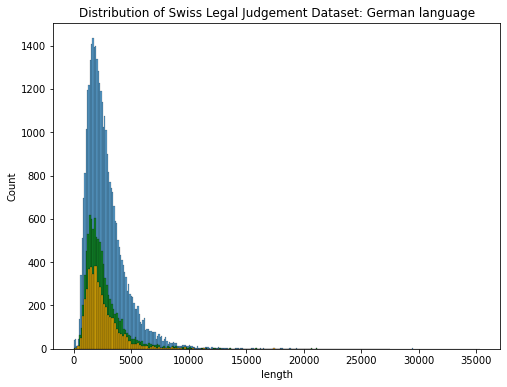

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x= "length",data = de_train).set(title='Distribution of Swiss Legal Judgement Dataset: German language')
sns.histplot(x= "length",data = de_test, color = "green")
sns.histplot(x= "length",data = de_validation, color = "orange")
plt.savefig("swiss_de_histplot.jpg")

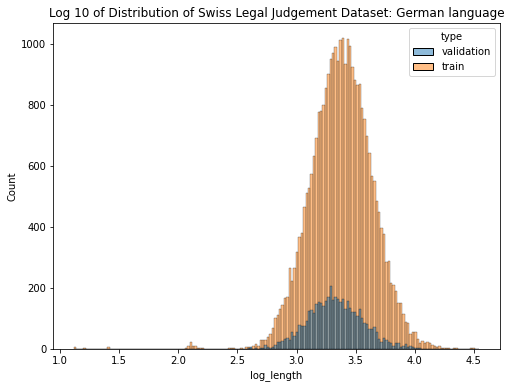

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x= "log_length",data = de, hue = "type").set(title='Log 10 of Distribution of Swiss Legal Judgement Dataset: German language')
plt.savefig("swiss_de_histplot_log.jpg")

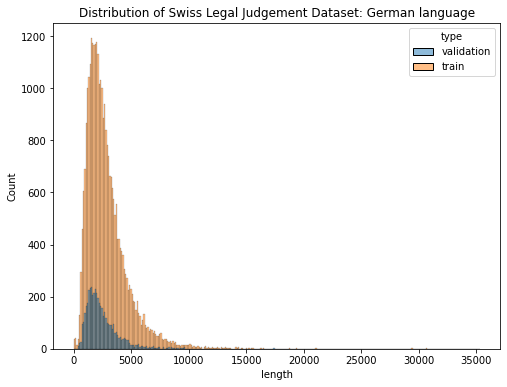

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x= "length",data = de,hue ="type").set(title='Distribution of Swiss Legal Judgement Dataset: German language')
plt.savefig("swiss_de_histplot.jpg")

In [ ]:
italy_train.head()
text = italy_train['text']
italy_train['length'] = text.str.len()
text_test = italy_test['text']
italy_test['length'] = text_test.str.len()
text_validation = italy_validation['text']
italy_validation['length'] = text_validation.str.len()

In [ ]:
italy = pd.concat([italy_validation, italy_train, italy_test])
italy['length']

In [ ]:
italy_validation['type'] = "validation"
italy_train['type'] = "train"
italy_test['type'] = "test"
italy = pd.concat([italy_validation, italy_train, italy_test])
italy['length']

In [ ]:
ital = italy[~italy.index.duplicated()]

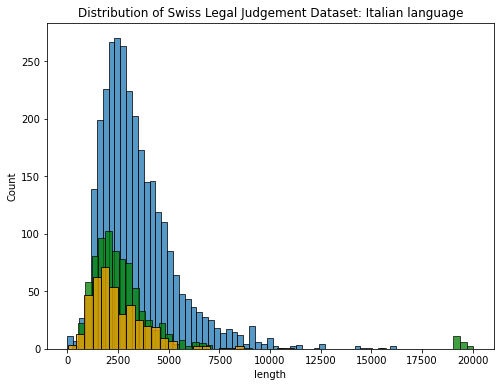

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x= "length",data = italy_train).set(title='Distribution of Swiss Legal Judgement Dataset: Italian language')
sns.histplot(x= "length",data = italy_test, color = "green")
sns.histplot(x= "length",data = italy_validation, color = "orange")
plt.savefig("Basic_Histogram_with_Seaborn_histplot.jpg")

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x= "length",data = ital)
plt.savefig("Basic_Histogram_with_Seaborn_histplot.jpg")

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x= "length",data=italy_train,bins=30).set(title='Distribution of Swiss Legal Judgement Italy Dataset')
sns.histplot(x= "length",data=italy_test,bins=30, color = 'aquamarine')
sns.histplot(x= "length",data=italy_validation ,bins=30, color = 'darkcyan')
plt.savefig("Basic_Histogram_with_Seaborn_histplot.jpg")

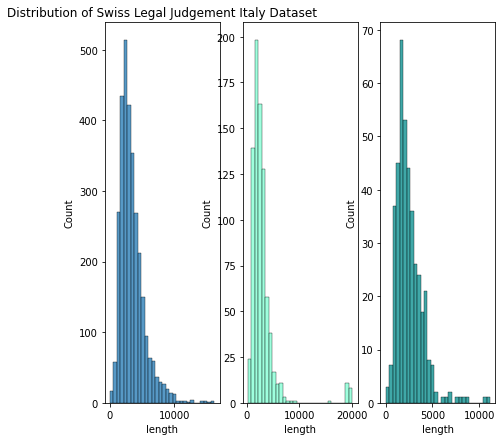

In [ ]:
#plt.figure(figsize=(8,6))
fig, axs = plt.subplots(1, 3, figsize=(7, 7))
sns.histplot(x= "length",data=italy_train,bins=30,ax=axs[ 0]).set(title='Distribution of Swiss Legal Judgement Italy Dataset')
sns.histplot(x= "length",data=italy_test,bins=30, color = 'aquamarine',ax=axs[1])
sns.histplot(x= "length",data=italy_validation ,bins=30, color = 'darkcyan',ax=axs[ 2])
plt.savefig("Basic_Histogram_with_Seaborn_histplot.jpg")


In [ ]:
from datasets import load_dataset
dataset = load_dataset("ecthr_cases")

In [ ]:
text_test = dataset['train']
df_pandas = pd.DataFrame(text_test)

In [ ]:
df_pandas

In [ ]:
text = df_pandas['facts']
df_pandas['length'] = text.str.len()
plt.hist(df_pandas['length'], color = 'yellow', bins = 500)
plt.title('Distribution of Document Word Counts', fontdict=dict(size=14))
plt.gca().set(xlim=(0, 20000),ylim=(0,1200), ylabel='Number of Obs', xlabel='Document Word Count')
plt.show()

In [ ]:
text_train = dataset['train']['text']
line_length = []
for text in text_train:
  c = len(text)
  line_length.append(c)

text_test = dataset['test']['text']
line_length = []
for text in text_test:
  c = len(text)
  line_length.append(c)

In [ ]:
import pandas as pd
df_pandas = pd.DataFrame(text_train)
text_test = dataset['test']['text']
df_pandas2 = pd.DataFrame(text_test)
text_dev = dataset['validation']['text']
df_pandas3 = pd.DataFrame(text_dev)

In [ ]:
text = df_pandas[0]
df_pandas['length'] = text.str.len()

text = df_pandas2[0]
df_pandas2['length'] = text.str.len()
text = df_pandas3[0]
df_pandas3['length'] = text.str.len()

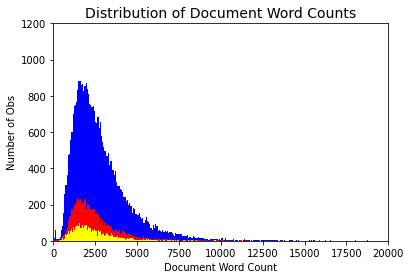

In [ ]:
plt.hist(df_pandas['length'], color = 'blue', bins = 500)
plt.hist(df_pandas2['length'], color = 'red', bins = 500)
plt.hist(df_pandas3['length'], color = 'yellow', bins = 500)
plt.title('Distribution of Document Word Counts', fontdict=dict(size=14))
plt.gca().set(xlim=(0, 20000),ylim=(0,1200), ylabel='Number of Obs', xlabel='Document Word Count')
plt.show()

In [ ]:
from datasets import load_dataset
dataset = load_dataset("ecthr_cases")

In [ ]:
text_test = dataset['train']['facts']
df_pandas = pd.DataFrame(text_train)
text_test = dataset['test']['facts']
df_pandas2 = pd.DataFrame(text_test)
text_dev = dataset['validation']['facts']
df_pandas3 = pd.DataFrame(text_dev)

In [ ]:
text = df_pandas[0]
df_pandas['length'] = text.str.len()
text = df_pandas2[0]
df_pandas2['length'] = text.str.len()
text = df_pandas3[0]
df_pandas3['length'] = text.str.len()

In [ ]:
df_pandas

,0,length
0,A.- Der 1955 geborene V._ war seit 1. Septembe...,3961
1,"Ansprüche nach OHG, hat sich ergeben: A.- X._ ...",3348
2,Art. 4 aBV (Strafverfahren wegen falschen Zeug...,2133
3,"Art. 5 Ziff. 1 EMRK (Haftentlassung), hat sich...",2542
4,"Mietvertrag, hat sich ergeben: A.- Die CT Cond...",1680
...,...,...
35453,Sachverhalt: A. Mit Einspracheentscheid vom 3....,1545
35454,"Sachverhalt: A. X._ wird vorgeworfen, sich am ...",1059
35455,Sachverhalt: A. X._ stellte in seinem Wohnhaus...,1140
35456,Sachverhalt: A. In den Monaten Dezember 2008 b...,1644


In [ ]:
plt.hist(df_pandas['length'], color = 'blue', bins = 390)
plt.hist(df_pandas2['length'], color = 'orange', bins = 5)
plt.hist(df_pandas3['length'], color = 'yellow', bins = 50)
plt.title('Distribution of Document Word Counts', fontdict=dict(size=14))
plt.gca().set(xlim=(0, 8000),ylim=(0,1500), ylabel='Number of Obs', xlabel='Document Word Count')
plt.show()

# sts benchmark plots 


In [ ]:
!pip install datasets
from datasets import load_dataset
dataset = load_dataset("mteb/stsbenchmark-sts")

In [ ]:
dataset['train']['sentence1']

In [ ]:
dataset['train']['sentence2']

In [10]:
from datasets import load_dataset
dataset = load_dataset("LysandreJik/glue-mnli-train")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:97: FutureWarning: Deprecated argument(s) used in 'dataset_info': token. Will not be supported from version '0.12'.
  warnings.warn(message, FutureWarning)


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/LysandreJik___parquet/LysandreJik--glue-mnli-train-844cb7e9afb11f03/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset['train']['premise']

In [21]:
import pandas as pd
de_train = pd.DataFrame(dataset['train'])
text = de_train['premise']


In [24]:
hypo = de_train['hypothesis']
de_train['length_hypothesis'] = hypo.str.len()

In [25]:
de_train['length_premise'] = text.str.len()
de_train.head()

,premise,hypothesis,label,idx,length,length_premise,length_hypothesis
0,Conceptually cream skimming has two basic dime...,Product and geography are what make cream skim...,1,0,77,77,57
1,you know during the season and i guess at at y...,You lose the things to the following level if ...,0,1,279,279,64
2,One of our number will carry out your instruct...,A member of my team will execute your orders w...,0,2,60,60,68
3,How do you know? All this is their information...,This information belongs to them.,0,3,53,53,33
4,yeah i tell you what though if you go price so...,The tennis shoes have a range of prices.,1,4,144,144,40


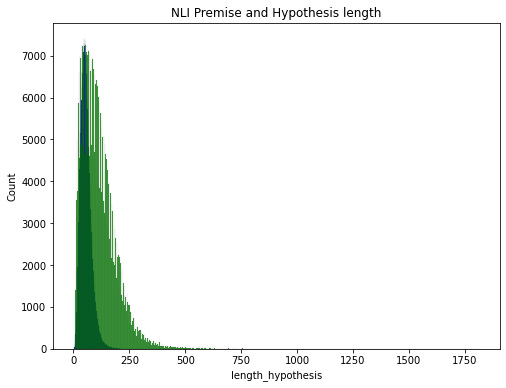

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(x= "length_hypothesis",data = de_train, color = "blue").set(title='NLI Premise and Hypothesis length')
sns.histplot(x= "length_premise",data = de_train, color = "green")
plt.savefig("Basic_Histogram_with_Seaborn_histplot.jpg")

In [34]:
dataset = load_dataset("glue", "stsb")
dataset['train']
de_train = pd.DataFrame(dataset['train'])
text = de_train['sentence1']
de_train['length_hypothesis'] = text.str.len()

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:97: FutureWarning: Deprecated argument(s) used in 'dataset_info': token. Will not be supported from version '0.12'.
  warnings.warn(message, FutureWarning)


  0%|          | 0/3 [00:00<?, ?it/s]

[Text(0.5, 1.0, 'Distribution of STS-Benchmark Sentences')]

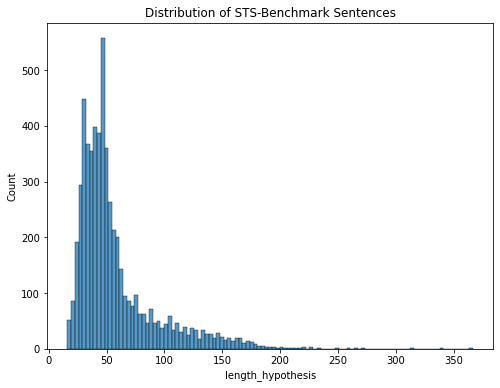

In [37]:
plt.figure(figsize=(8,6))
sns.histplot(x= "length_hypothesis",data = de_train).set(title='Distribution of STS-Benchmark Sentences')

#plt.savefig("Basic_Histogram_with_Seaborn_histplot.jpg")